In [1]:
#load the package
import pandas as pd
import csv
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
boros = gpd.read_file('https://github.com/jreades/i2p/blob/master/data/src/Boroughs.gpkg?raw=true')
cgn = pd.read_csv('cgn.csv')

C:\Users\a\Anaconda3\envs\cusplondon\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


In [3]:
shape=gpd.read_file('http://data.dft.gov.uk/road-traffic/major-roads-link-network2019.zip')

<AxesSubplot:>

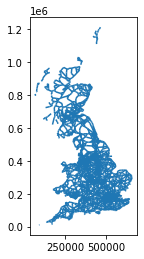

In [4]:
shape.plot()

In [5]:
shape

,CP_Number,RoadNumber,geometry
0,90278.0,A33,"LINESTRING (441960.000 117130.000, 441990.000 ..."
1,617.0,A4058,"LINESTRING (303310.000 190930.000, 305830.000 ..."
2,91195.0,A4059,"LINESTRING (304810.000 199260.000, 302480.000 ..."
3,620.0,A4061,"LINESTRING (293940.000 194590.000, 295520.000 ..."
4,721.0,A9,"LINESTRING (278502.000 881036.000, 277085.000 ..."
...,...,...,...
18192,91193.0,A6089,"LINESTRING (372029.583 634839.140, 370850.000 ..."
18193,91194.0,A6089,"LINESTRING (373250.000 634210.000, 372023.939 ..."
18194,91292.0,A83,"LINESTRING (172069.999 620480.000, 182279.999 ..."
18195,91293.0,A380,"LINESTRING (288517.712 66497.999, 287369.997 6..."


In [6]:
cgn

,ONS area code,Road Name,2019,2020,change%
0,E09000002,A1083,98.8,68.4,-0.308
1,E09000002,A1112,103.5,87.1,-0.158
2,E09000002,A1153,91.4,71.4,-0.219
3,E09000002,A118,153.9,141.9,-0.078
4,E09000002,A123,101.9,91.4,-0.103
...,...,...,...,...,...
361,E09000033,A4209,223.7,166.2,-0.257
362,E09000033,A5,189.0,200.1,0.059
363,E09000033,A501,275.4,144.3,-0.476
364,E09000033,A5204,332.7,238.1,-0.284


In [7]:
cg_road = pd.merge(cgn, shape, left_on = 'Road Name', right_on = 'RoadNumber', how = 'left')

In [8]:
cg_road.head

<bound method NDFrame.head of      ONS area code Road Name   2019   2020  change%  CP_Number RoadNumber  \
0       E09000002      A1083   98.8   68.4   -0.308    17461.0      A1083   
1       E09000002      A1083   98.8   68.4   -0.308    71007.0      A1083   
2       E09000002      A1112  103.5   87.1   -0.158    17472.0      A1112   
3       E09000002      A1112  103.5   87.1   -0.158    27913.0      A1112   
4       E09000002      A1112  103.5   87.1   -0.158    47555.0      A1112   
...            ...       ...    ...    ...      ...        ...        ...   
8291    E09000033      A5204  332.7  238.1   -0.284    48010.0      A5204   
8292    E09000033      A5204  332.7  238.1   -0.284    70191.0      A5204   
8293    E09000033      A5205  101.4   93.0   -0.083    27787.0      A5205   
8294    E09000033      A5205  101.4   93.0   -0.083    47788.0      A5205   
8295    E09000033      A5205  101.4   93.0   -0.083    58196.0      A5205   

                                             

In [9]:
cg_road = gpd.GeoDataFrame(cg_road)

<AxesSubplot:>

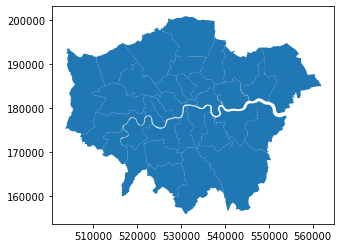

In [10]:
boros.plot()

In [11]:
cg_road['sum']=cg_road['2020'] - cg_road['2019']
cg_lon = gpd.sjoin(cg_road, boros, op='within')

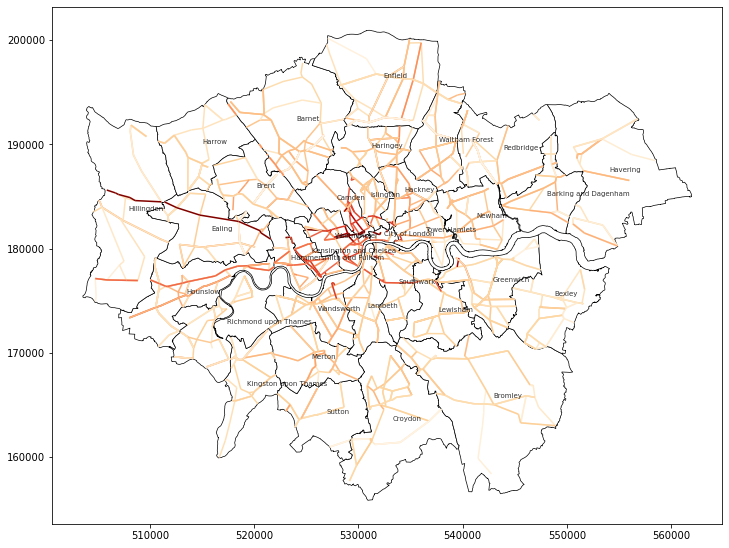

In [12]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
cg_lon.plot(ax=axes, column='2019', cmap='OrRd')
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)

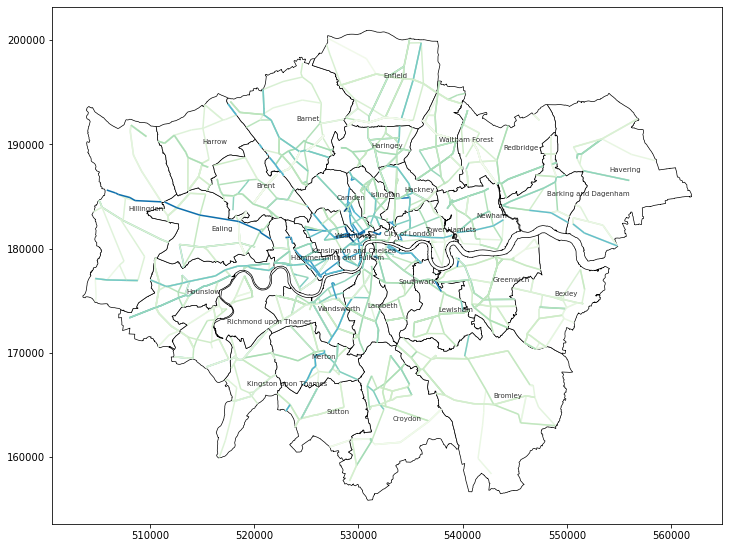

In [13]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
cg_lon.plot(ax=axes, column='2020', cmap='GnBu')
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)

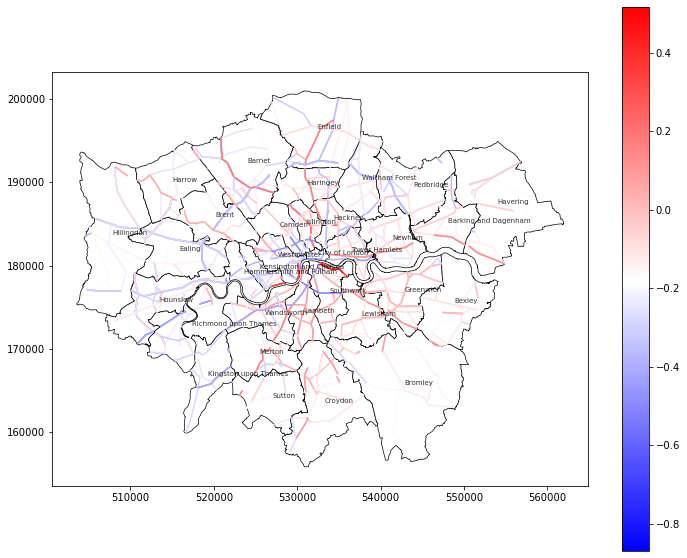

In [14]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
cg_lon.plot(ax=axes, column='change%', cmap='bwr', legend=True)
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)

In [15]:
bg = pd.merge(boros, cg_lon.groupby("GSS_CODE").agg({'sum':'sum','2019':'sum'}), left_on='GSS_CODE', right_on='GSS_CODE', how='left')

In [16]:
bg['rate']=bg['sum'] / bg['2019']

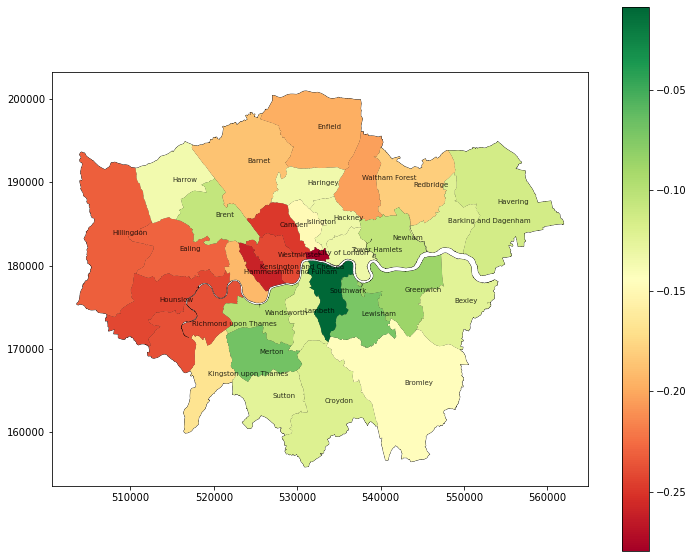

In [17]:
fig, axes = plt.subplots(1,1, figsize=(12,10))
boros.plot(ax=axes, edgecolor = 'black', facecolor='white', linewidth=0.7, alpha=1)
bg.plot(ax=axes, column='rate', cmap='RdYlGn', legend=True)
for loc, label in zip(boros.geometry.centroid,boros.NAME):
    axes.text(loc.x,loc.y,label,size=7,color="black", alpha=0.8)